# Obtain Summary Statistics of the Corpus

In [23]:
!pip install textstat

In [24]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# set global values
ted_red = '#e62b1e'
sns.set(style='white', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)  

In [26]:
pattern = r"(\([A-Za-z]*\))"

def rep_markers(x):
    """
    Replace markers like (Laughter)
    """

    return re.sub(pattern, '', x)

def syll_cnt(x):

    return textstat.syllable_count(rep_markers(x))

def word_cnt(x):

    return textstat.lexicon_count(rep_markers(x))

def sent_cnt(x):

    return textstat.sentence_count(rep_markers(x))

## Summary stats of raw corpus (before preprocessing)

The number of documents in the corpus 4298

The number of documents in the corpus 4298
The mean number of syllables in all documents 2435
The mean number of words in all documents 1736
The mean number of sentences in all documents 86

The standard deviation of syllables in all documents 1397
The standard deviation of words in all documents 1023
The standard deviation of sentences in all documents 54

The median number of syllables in all documents 2360
The median number of words in all documents 1660
The median number of sentences in all documents 78

The minimum number of syllables in all documents 5
The minimum number of words in all documents 1
The minimum number of sentences in all documents 1

The maximum number of syllables in all documents 14945
The maximum number of words in all documents 11023
The maximum number of sentences in all documents 524


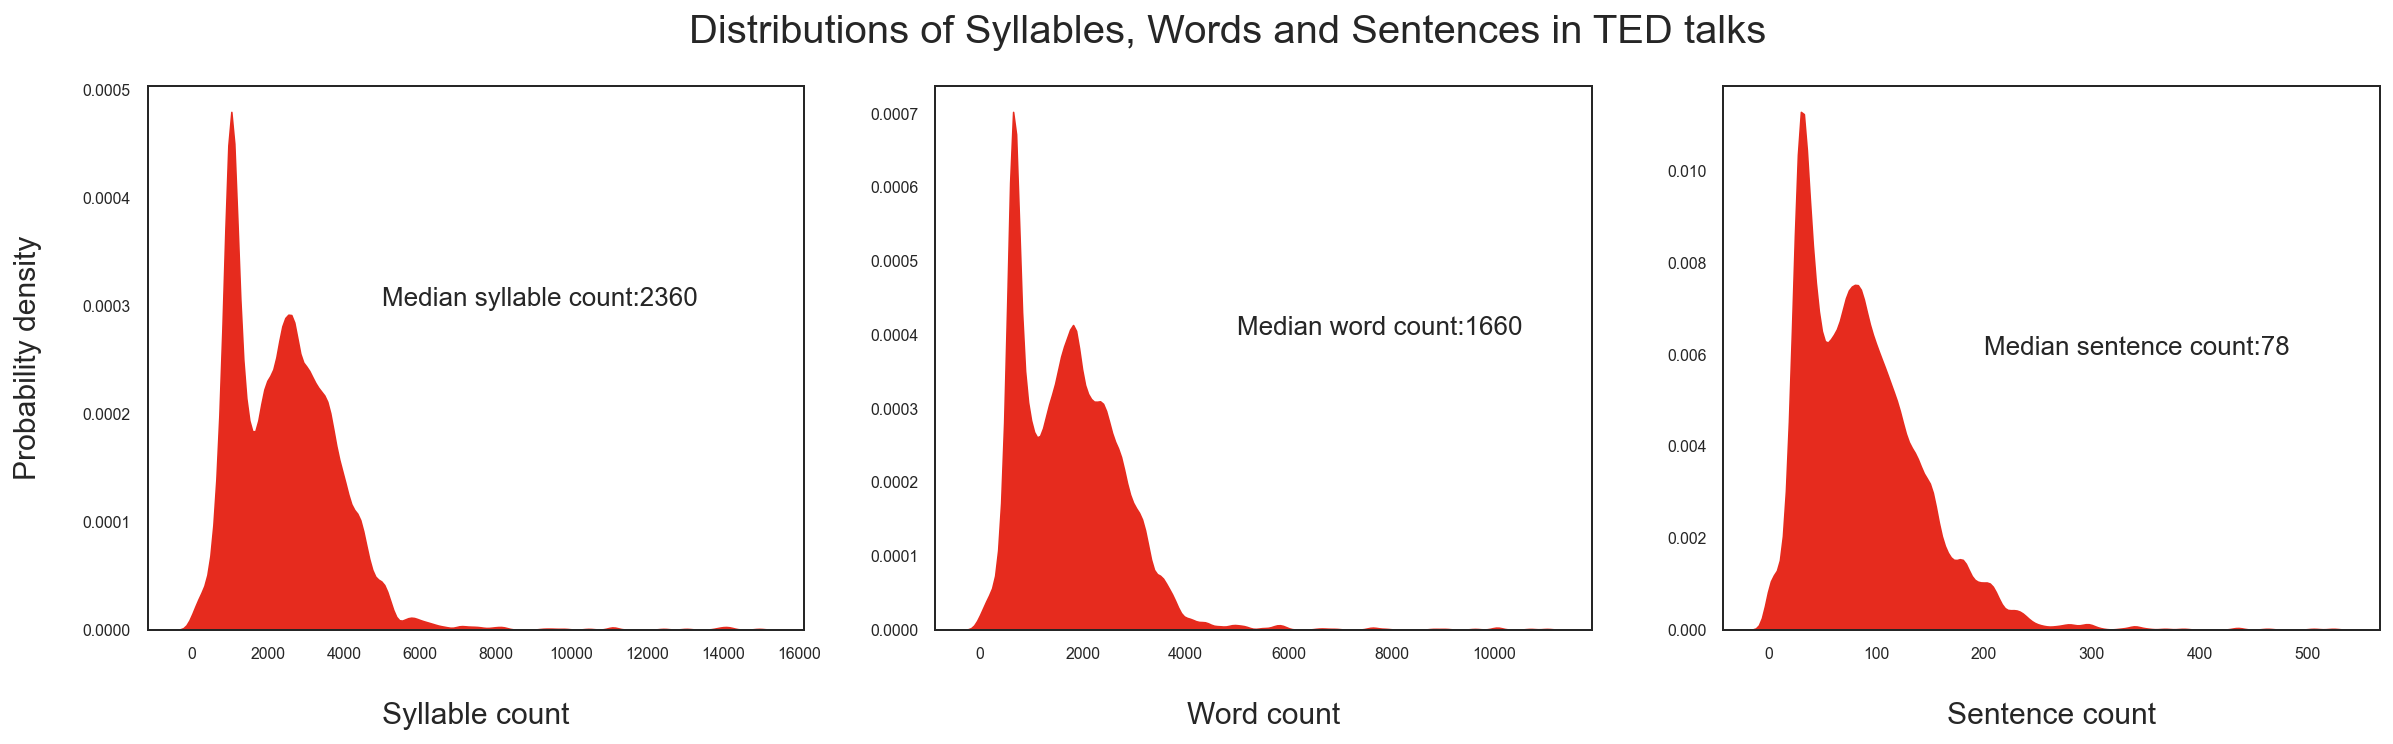

In [27]:
tr = pd.read_csv('../data/raw/transcript_data.csv')
tr = tr.dropna()
tr['syll'] = tr['transcript'].apply(textstat.syllable_count)
tr['words'] = tr['transcript'].apply(textstat.lexicon_count)
tr['sent'] = tr['transcript'].apply(textstat.sentence_count)

# summary stat measures
print(f"The number of documents in the corpus {tr.shape[0]}")
print()
print(f"The number of documents in the corpus {tr.shape[0]}")
print(f"The mean number of syllables in all documents {round(tr.syll.mean())}")
print(f"The mean number of words in all documents {round(tr.words.mean())}")
print(f"The mean number of sentences in all documents {round(tr.sent.mean())}")
print()
print(f"The standard deviation of syllables in all documents {round(tr.syll.std())}")
print(f"The standard deviation of words in all documents {round(tr.words.std())}")
print(f"The standard deviation of sentences in all documents {round(tr.sent.std())}")
print()
print(f"The median number of syllables in all documents {round(tr.syll.median())}")
print(f"The median number of words in all documents {round(tr.words.median())}")
print(f"The median number of sentences in all documents {round(tr.sent.median())}")
print()
print(f"The minimum number of syllables in all documents {round(tr.syll.min())}")
print(f"The minimum number of words in all documents {round(tr.words.min())}")
print(f"The minimum number of sentences in all documents {round(tr.sent.min())}")
print()
print(f"The maximum number of syllables in all documents {round(tr.syll.max())}")
print(f"The maximum number of words in all documents {round(tr.words.max())}")
print(f"The maximum number of sentences in all documents {round(tr.sent.max())}")

# distribution plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distributions of Syllables, Words and Sentences in TED talks', fontsize=20)

sns.kdeplot(ax=axes[0], x='syll', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[0].set_xlabel('\nSyllable count', fontsize=15)
axes[0].set_ylabel('Probability density\n', fontsize=15)
axes[0].annotate(text=("Median syllable count:"+str(round(tr.syll.median()))),
               xy=(5000, 0.0003), xycoords='data', fontsize=13)

sns.kdeplot(ax=axes[1], x='words', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[1].set_xlabel('\nWord count', fontsize=15)
axes[1].set_ylabel('', fontsize=15)
axes[1].annotate(text=("Median word count:"+str(round(tr.words.median()))),
               xy=(5000, 0.0004), xycoords='data', fontsize=13)

sns.kdeplot(ax=axes[2], x='sent', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[2].set_xlabel('\nSentence count', fontsize=15)
axes[2].set_ylabel('', fontsize=15)
axes[2].annotate(text=("Median sentence count:"+str(round(tr.sent.median()))),
               xy=(200, 0.006), xycoords='data', fontsize=13)

plt.show()

## Summary stats of preprocessed corpus

The number of documents in the corpus 3119

The mean number of syllables in all documents 2702
The mean number of words in all documents 1941
The mean number of sentences in all documents 97

The standard deviation of syllables in all documents 1098
The standard deviation of words in all documents 802
The standard deviation of sentences in all documents 46

The median number of syllables in all documents 2653
The median number of words in all documents 1893
The median number of sentences in all documents 91

The minimum number of syllables in all documents 361
The minimum number of words in all documents 240
The minimum number of sentences in all documents 16

The maximum number of syllables in all documents 7511
The maximum number of words in all documents 5856
The maximum number of sentences in all documents 298


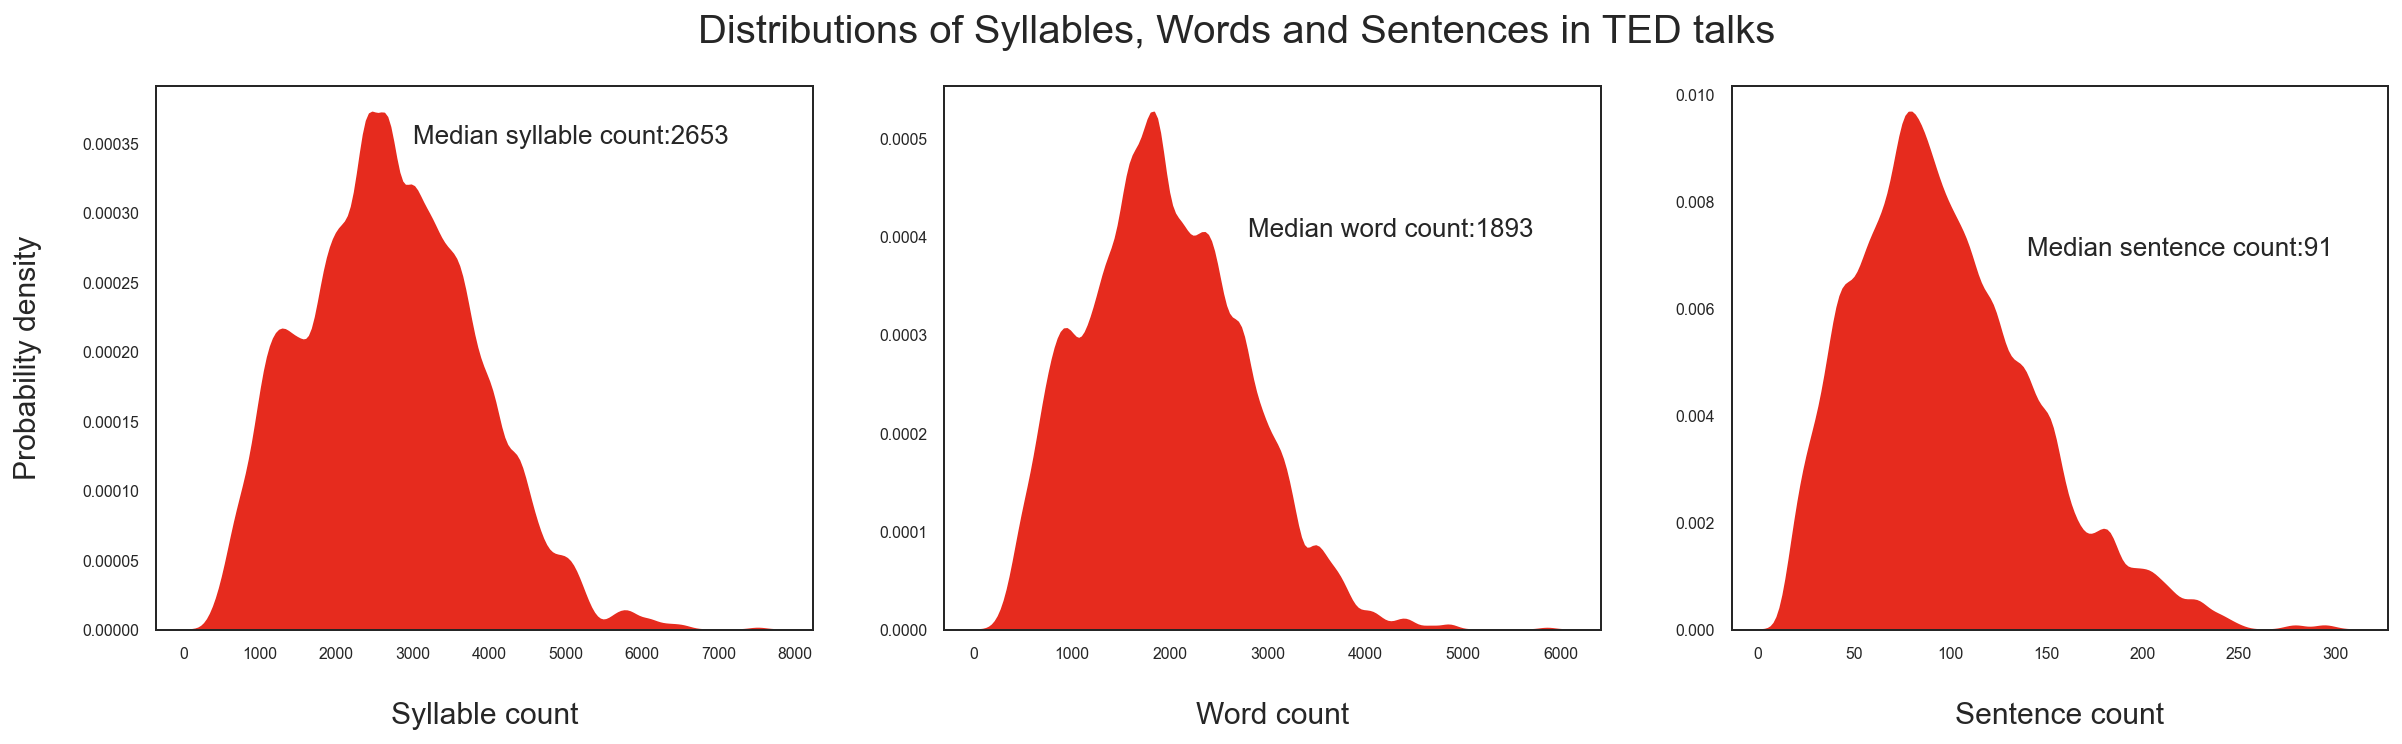

In [31]:
# for clean TED data

tr = pd.read_csv('../data/interim/ted_preprocessed.csv')

print(f"The number of documents in the corpus {tr.shape[0]}")
print()
print(f"The mean number of syllables in all documents {round(tr.syll.mean())}")
print(f"The mean number of words in all documents {round(tr.words.mean())}")
print(f"The mean number of sentences in all documents {round(tr.sent.mean())}")
print()
print(f"The standard deviation of syllables in all documents {round(tr.syll.std())}")
print(f"The standard deviation of words in all documents {round(tr.words.std())}")
print(f"The standard deviation of sentences in all documents {round(tr.sent.std())}")
print()
print(f"The median number of syllables in all documents {round(tr.syll.median())}")
print(f"The median number of words in all documents {round(tr.words.median())}")
print(f"The median number of sentences in all documents {round(tr.sent.median())}")
print()
print(f"The minimum number of syllables in all documents {round(tr.syll.min())}")
print(f"The minimum number of words in all documents {round(tr.words.min())}")
print(f"The minimum number of sentences in all documents {round(tr.sent.min())}")
print()
print(f"The maximum number of syllables in all documents {round(tr.syll.max())}")
print(f"The maximum number of words in all documents {round(tr.words.max())}")
print(f"The maximum number of sentences in all documents {round(tr.sent.max())}")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distributions of Syllables, Words and Sentences in TED talks', fontsize=20)

sns.kdeplot(ax=axes[0], x='syll', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[0].set_xlabel('\nSyllable count', fontsize=15)
axes[0].set_ylabel('Probability density\n', fontsize=15)
axes[0].annotate(text=("Median syllable count:"+str(round(tr.syll.median()))),
               xy=(3000, 0.00035), xycoords='data', fontsize=13)

sns.kdeplot(ax=axes[1], x='words', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[1].set_xlabel('\nWord count', fontsize=15)
axes[1].set_ylabel('', fontsize=15)
axes[1].annotate(text=("Median word count:"+str(round(tr.words.median()))),
               xy=(2800, 0.0004), xycoords='data', fontsize=13)

sns.kdeplot(ax=axes[2], x='sent', data=tr, bw_adjust=.50, fill=True, color=ted_red, alpha=1)
axes[2].set_xlabel('\nSentence count', fontsize=15)
axes[2].set_ylabel('', fontsize=15)
axes[2].annotate(text=("Median sentence count:"+str(round(tr.sent.median()))),
               xy=(140, 0.007), xycoords='data', fontsize=13)

plt.savefig('../reports/figures/summ_stat_dist.png', bbox_inches='tight')